In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.07']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
956,Afghanistan,22.10.07,200130
1924,Africa,22.10.07,12362219
2880,Albania,22.10.07,332443
3836,Algeria,22.10.07,270701
4786,Andorra,22.10.07,46275
...,...,...,...
218373,Wallis and Futuna,22.10.07,761
219364,World,22.10.07,620930512
220275,Yemen,22.10.07,11939
221209,Zambia,22.10.07,333555


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
956,Afghanistan,22.10.07,200130
2880,Albania,22.10.07,332443
3836,Algeria,22.10.07,270701
4786,Andorra,22.10.07,46275
5718,Angola,22.10.07,103131
...,...,...,...
217654,Vietnam,22.10.07,11485361
218373,Wallis and Futuna,22.10.07,761
220275,Yemen,22.10.07,11939
221209,Zambia,22.10.07,333555


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
210400,United States,22.10.07,96686904
92136,India,22.10.07,44609257
70804,France,22.10.07,35828595
28522,Brazil,22.10.07,34707233
75556,Germany,22.10.07,33948632
186449,South Korea,22.10.07,24953135
209410,United Kingdom,22.10.07,23735277
99805,Italy,22.10.07,22737577
101736,Japan,22.10.07,21517962
165762,Russia,22.10.07,20861561


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
203558,Turkey,22.10.07,16873793
188345,Spain,22.10.07,13441941
151674,Oceania,22.10.07,12451992
217654,Vietnam,22.10.07,11485361
12485,Australia,22.10.07,10275681
...,...,...,...
218373,Wallis and Futuna,22.10.07,761
94060,International,22.10.07,721
215727,Vatican,22.10.07,29
205565,Tuvalu,22.10.07,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.07', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_13612\4278752943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.07', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.07,96686904
India,22.10.07,44609257
France,22.10.07,35828595
Brazil,22.10.07,34707233
Germany,22.10.07,33948632
South Korea,22.10.07,24953135
United Kingdom,22.10.07,23735277
Italy,22.10.07,22737577
Japan,22.10.07,21517962


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.07,96686904
1,India,22.10.07,44609257
2,France,22.10.07,35828595
3,Brazil,22.10.07,34707233
4,Germany,22.10.07,33948632
5,South Korea,22.10.07,24953135
6,United Kingdom,22.10.07,23735277
7,Italy,22.10.07,22737577
8,Japan,22.10.07,21517962
9,Russia,22.10.07,20861561


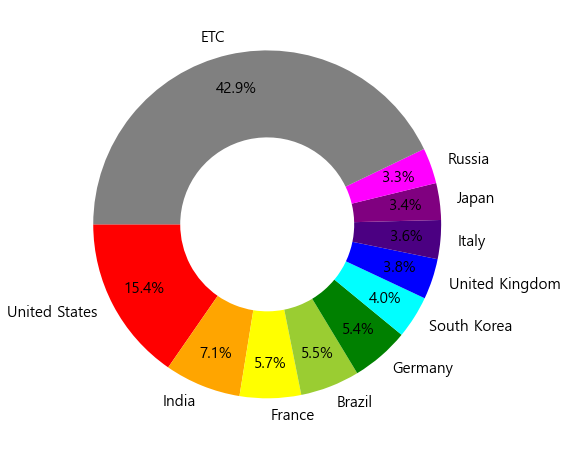

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()